# First analysis
First data analysis based on diabetes.csv downloaded from Kaggle. <br>
Data source: https://www.kaggle.com/uciml/pima-indians-diabetes-database


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

data = pd.read_csv('FILES/diabetes.csv', sep=',')
data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
499,6,154,74,32,193,29.3,0.839,39,0
47,2,71,70,27,0,28.0,0.586,22,0
398,3,82,70,0,0,21.1,0.389,25,0
604,4,183,0,0,0,28.4,0.212,36,1
628,5,128,80,0,0,34.6,0.144,45,0
704,4,110,76,20,100,28.4,0.118,27,0
706,10,115,0,0,0,0.0,0.261,30,1
407,0,101,62,0,0,21.9,0.336,25,0
326,1,122,64,32,156,35.1,0.692,30,1
105,1,126,56,29,152,28.7,0.801,21,0


The code above simply reads the .csv file and stores the data in data variable. Now let's take a look on the data and count NaNs or 0 values.

In [2]:
# describing the dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
# checking information about the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# checking null values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# checking how many of each columns are 0's
for c in data.columns:
    print(c + ': ' + str(data[data[c] == 0][c].count()))

Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


There can be women with no pregnancies, but data for Glucose, BloodPressure, SkinThickness, Insulin and BMI is incomplete.<br>Now let's see how many patients did have diabetes.

In [6]:
# outcome count:
data['Outcome'].value_counts(normalize=True) * 100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

OK, so now we know that 65% of dataset did not have diabetes against 35% who had. I assume that people who had diabetes have different values of parameters than people who did not have it. That is why I change 0's with median for corresponding value.

In [7]:
# changing 0's to NaN so that they do not change the median value
for c in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    data[c].replace(0, np.NaN, inplace=True)

In [8]:
# check if correct number of cells has been changed
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [9]:
# how it looks in dataframe
data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
353,1,90.0,62.0,12.0,43.0,27.2,0.580,24,0
254,12,92.0,62.0,7.0,258.0,27.6,0.926,44,1
489,8,194.0,80.0,NaN,NaN,26.1,0.551,67,0
514,3,99.0,54.0,19.0,86.0,25.6,0.154,24,0
711,5,126.0,78.0,27.0,22.0,29.6,0.439,40,0
745,12,100.0,84.0,33.0,105.0,30.0,0.488,46,0
267,2,128.0,64.0,42.0,NaN,40.0,1.101,24,0
277,0,104.0,64.0,23.0,116.0,27.8,0.454,23,0
21,8,99.0,84.0,NaN,NaN,35.4,0.388,50,0
18,1,103.0,30.0,38.0,83.0,43.3,0.183,33,0


In [10]:
# print actual medians grouped by outcome
data.groupby('Outcome').median()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,2,107.0,70.0,27.0,102.5,30.1,0.336,27
1,4,140.0,74.5,32.0,169.5,34.3,0.449,36


In [11]:
# change NaN's to corresponding median
for c in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    data.loc[(data['Outcome'] == 0) & (data[c].isnull()), c] = data[data['Outcome'] == 0][c].median() 
    data.loc[(data['Outcome'] == 1) & (data[c].isnull()), c] = data[data['Outcome'] == 1][c].median() 
data.isnull().sum()             

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
# print actual medians grouped by outcome
data.groupby('Outcome').median()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,2,107.0,70.0,27.0,102.5,30.1,0.336,27
1,4,140.0,74.5,32.0,169.5,34.3,0.449,36


In [13]:
data.groupby('Outcome').describe()

Pregnancies                                                Glucose  \
              count      mean       std  min   25%  50%  75%   max   count   
Outcome                                                                      
0             500.0  3.298000  3.017185  0.0  1.00  2.0  5.0  13.0   500.0   
1             268.0  4.865672  3.741239  0.0  1.75  4.0  8.0  17.0   268.0   

                     ... DiabetesPedigreeFunction           Age             \
               mean  ...                      75%    max  count       mean   
Outcome              ...                                                     
0        110.622000  ...                  0.56175  2.329  500.0  31.190000   
1        142.302239  ...                  0.72800  2.420  268.0  37.067164   

                                                  
               std   min   25%   50%   75%   max  
Outcome                                           
0        11.667655  21.0  23.0  27.0  37.0  81.0  
1        10.968254  21.0  28.0  36.0  44.0  70.0  

[2 rows x 64 columns]

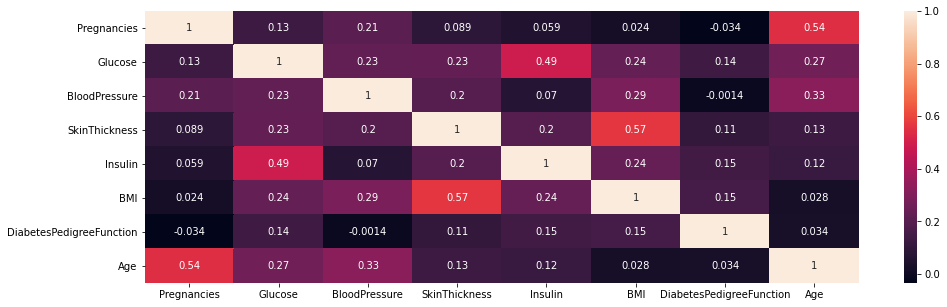

In [14]:
corrMatrix = data.iloc[:,0:8].corr()
plt.figure(figsize = (16,5))
sns.heatmap(corrMatrix, annot=True) 
plt.show()

From correlation matrix we see that there is a high correlation between Age and Pregnancies (0.54), Insulin and Glucose (0.49) as well as BMI and SkinThickness (0.57). Let's see how these parameters look on a scatter plot.

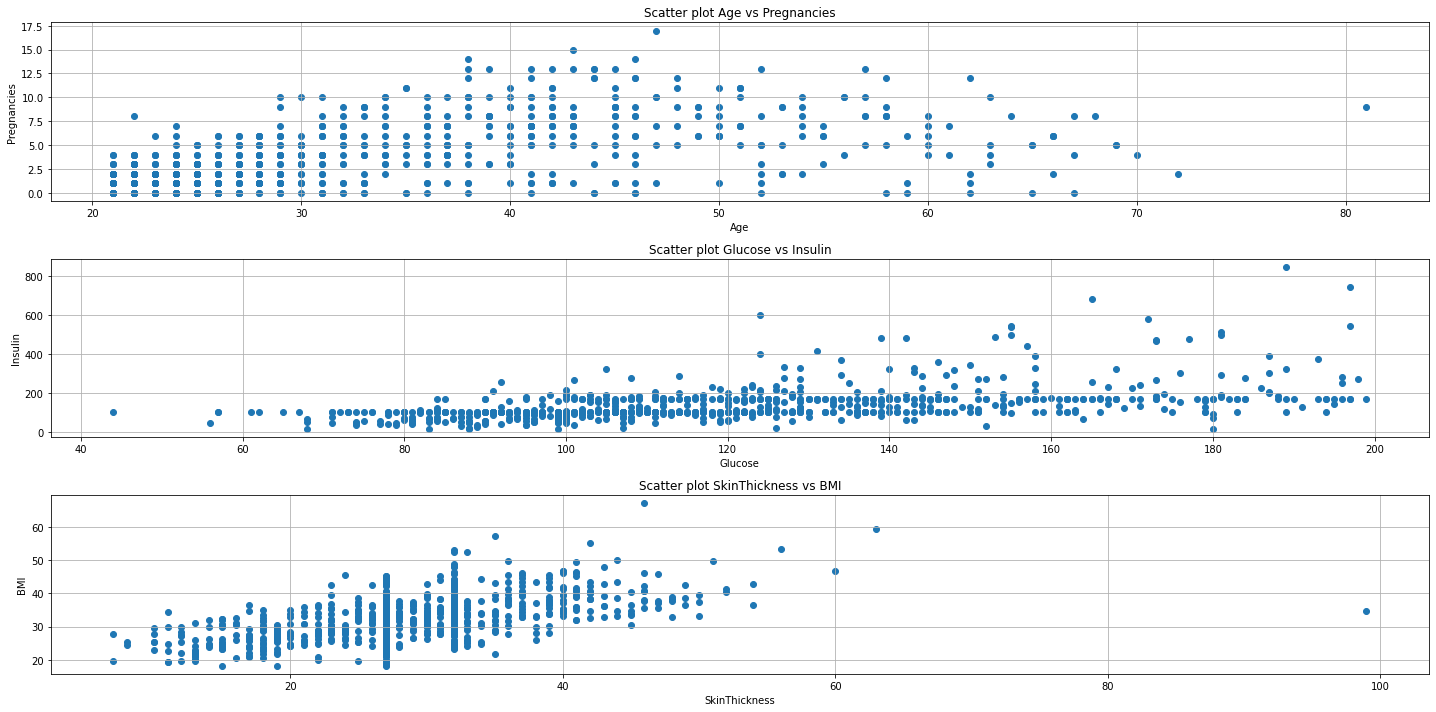

In [24]:
plt.figure(figsize=(20,10))
plt.subplot(311) 
plt.scatter(x=data['Age'], y=data['Pregnancies'])
plt.grid(True)
plt.xlabel('Age')
plt.ylabel('Pregnancies')
plt.title('Scatter plot Age vs Pregnancies')

plt.subplot(312)
plt.scatter(x=data['Glucose'], y=data['Insulin'])
plt.grid(True)
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.title('Scatter plot Glucose vs Insulin')

plt.subplot(313)
plt.scatter(x=data['SkinThickness'], y=data['BMI'])
plt.grid(True)
plt.xlabel('SkinThickness')
plt.ylabel('BMI')
plt.title('Scatter plot SkinThickness vs BMI')

plt.tight_layout() 
plt.show()

Maybe it will be good to see the scatter plots for each outcome separately. 

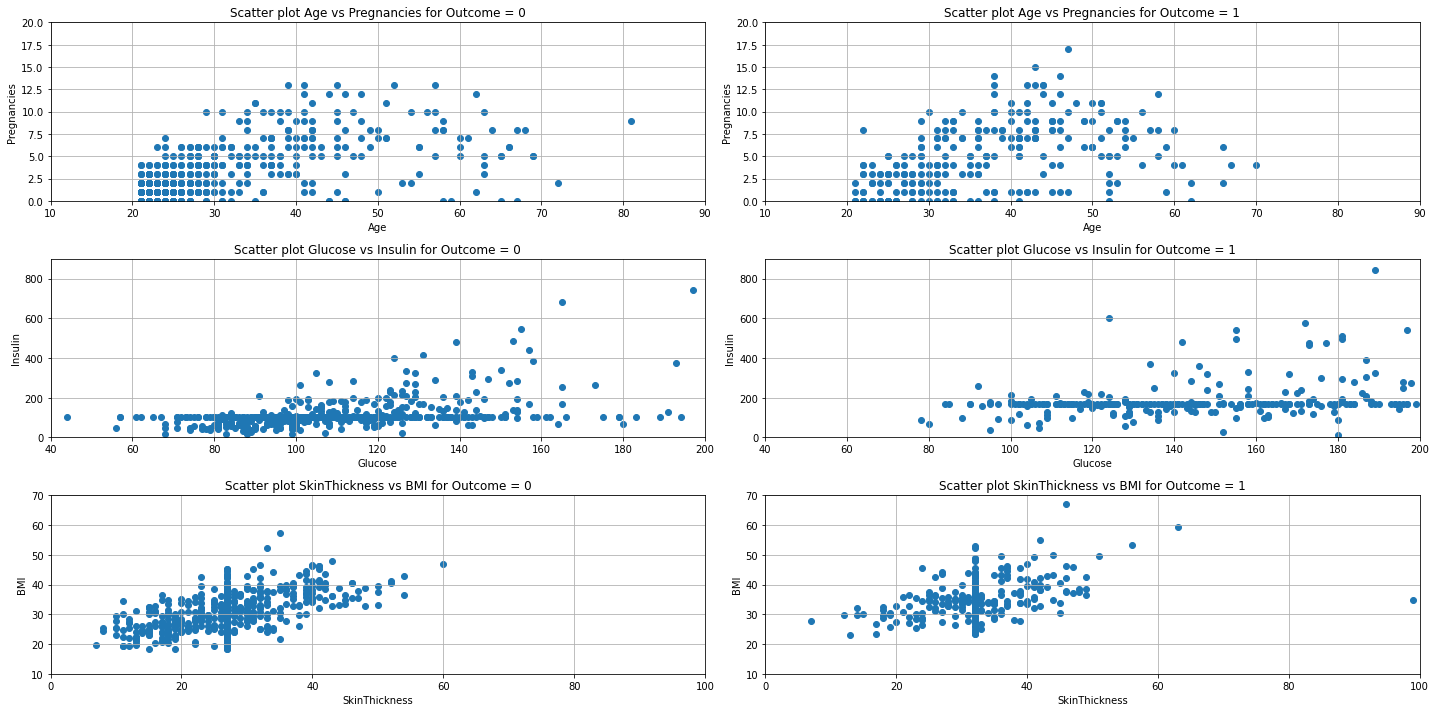

In [32]:
plt.figure(figsize=(20,10))
plt.subplot(321) 
plt.scatter(x=data[data['Outcome'] == 0]['Age'], y=data[data['Outcome'] == 0]['Pregnancies'])
plt.grid(True)
plt.xlabel('Age')
plt.xlim(10,90)
plt.ylim(0,20)
plt.ylabel('Pregnancies')
plt.title('Scatter plot Age vs Pregnancies for Outcome = 0')

plt.subplot(322) 
plt.scatter(x=data[data['Outcome'] == 1]['Age'], y=data[data['Outcome'] == 1]['Pregnancies'])
plt.grid(True)
plt.xlabel('Age')
plt.xlim(10,90)
plt.ylim(0,20)
plt.ylabel('Pregnancies')
plt.title('Scatter plot Age vs Pregnancies for Outcome = 1')

plt.subplot(323)
plt.scatter(x=data[data['Outcome'] == 0]['Glucose'], y=data[data['Outcome'] == 0]['Insulin'])
plt.grid(True)
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.xlim(40,200)
plt.ylim(0,900)
plt.title('Scatter plot Glucose vs Insulin for Outcome = 0')

plt.subplot(324)
plt.scatter(x=data[data['Outcome'] == 1]['Glucose'], y=data[data['Outcome'] == 1]['Insulin'])
plt.grid(True)
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.xlim(40,200)
plt.ylim(0,900)
plt.title('Scatter plot Glucose vs Insulin for Outcome = 1')

plt.subplot(325)
plt.scatter(x=data[data['Outcome'] == 0]['SkinThickness'], y=data[data['Outcome'] == 0]['BMI'])
plt.grid(True)
plt.xlabel('SkinThickness')
plt.ylabel('BMI')
plt.xlim(0,100)
plt.ylim(10,70)
plt.title('Scatter plot SkinThickness vs BMI for Outcome = 0')

plt.subplot(326)
plt.scatter(x=data[data['Outcome'] == 1]['SkinThickness'], y=data[data['Outcome'] == 1]['BMI'])
plt.grid(True)
plt.xlabel('SkinThickness')
plt.ylabel('BMI')
plt.xlim(0,100)
plt.ylim(10,70)
plt.title('Scatter plot SkinThickness vs BMI for Outcome = 1')

plt.tight_layout() 
plt.show()

We can see also histograms for each parameter but separately for Outcome = 1 and Outcome = 0. <BR> # DODAĆ LEGENDY DOBRE I DOBRAĆ ODPOWIEDNIE SKALE WYKRESÓW

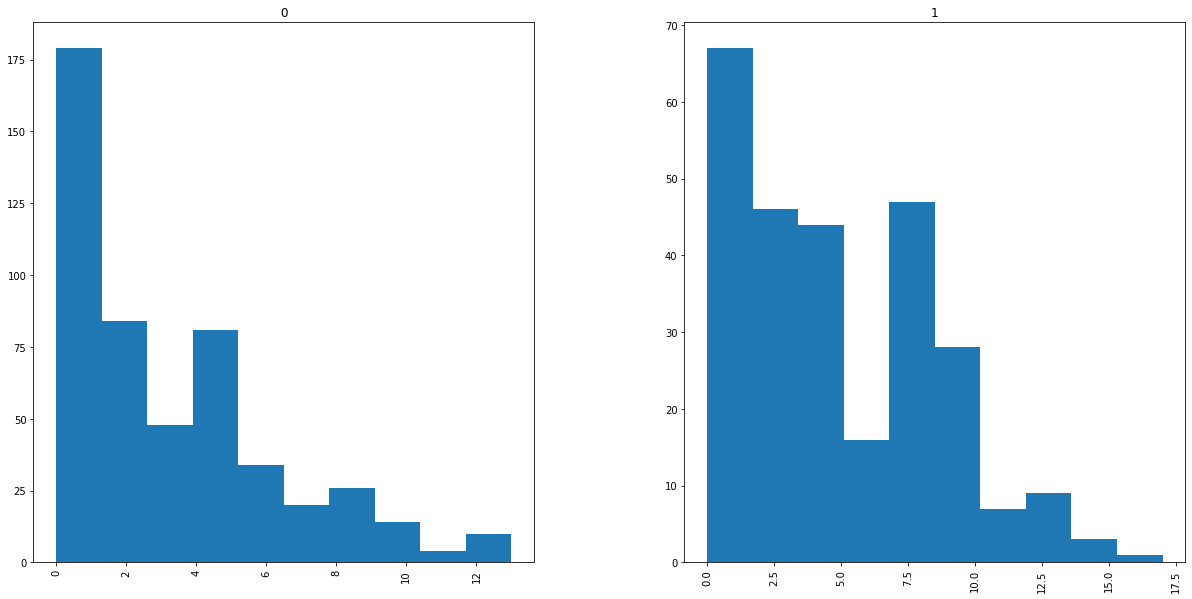

In [33]:
# histogram for pregnancies
# different histograms for Outcome = 1 and Outcome = 0

hist = data.hist(column='Pregnancies', by='Outcome', bins=10, xlabelsize=None, figsize=(20,10));

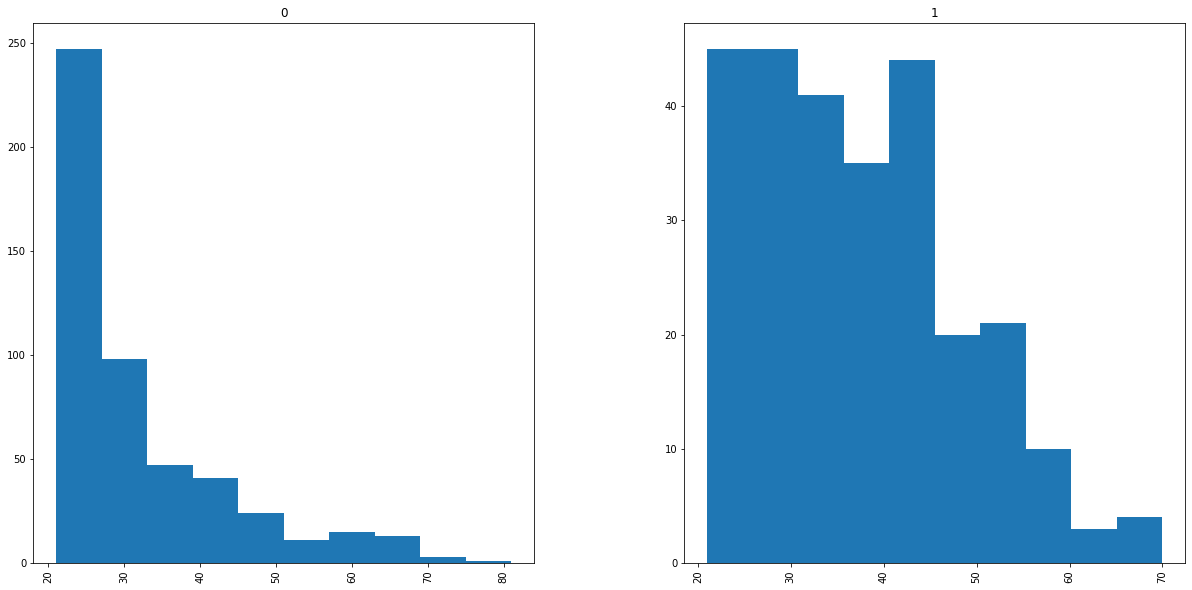

In [18]:
# histogram for Age
# different histograms for Outcome = 1 and Outcome = 0

data.hist(column='Age', by='Outcome', bins=10, figsize=(20,10));

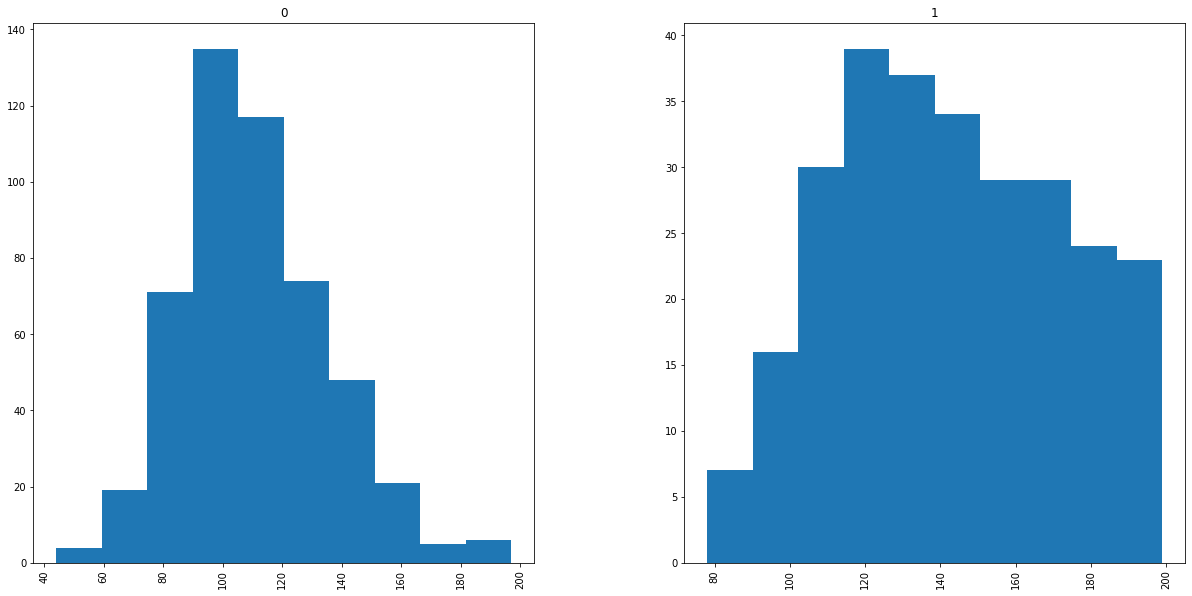

In [19]:
# histogram for Glucose
# different histograms for Outcome = 1 and Outcome = 0
data.hist(column='Glucose', by='Outcome', bins=10, figsize=(20,10));

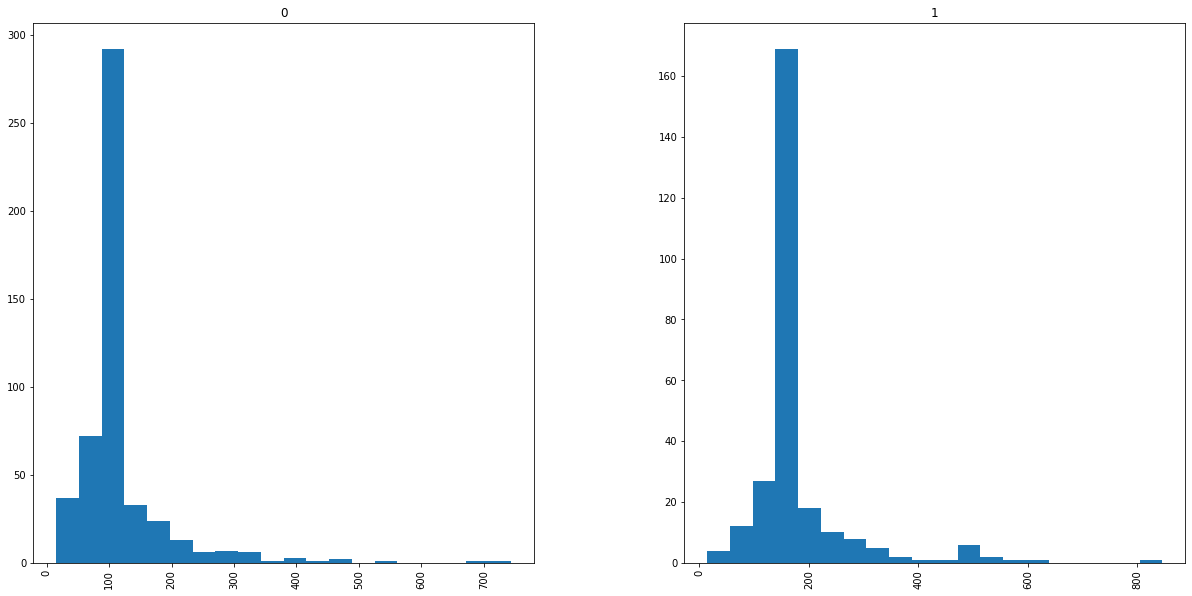

In [20]:
# histogram for Insulin
# different histograms for Outcome = 1 and Outcome = 0
data.hist(column='Insulin', by='Outcome', bins=20, figsize=(20,10));

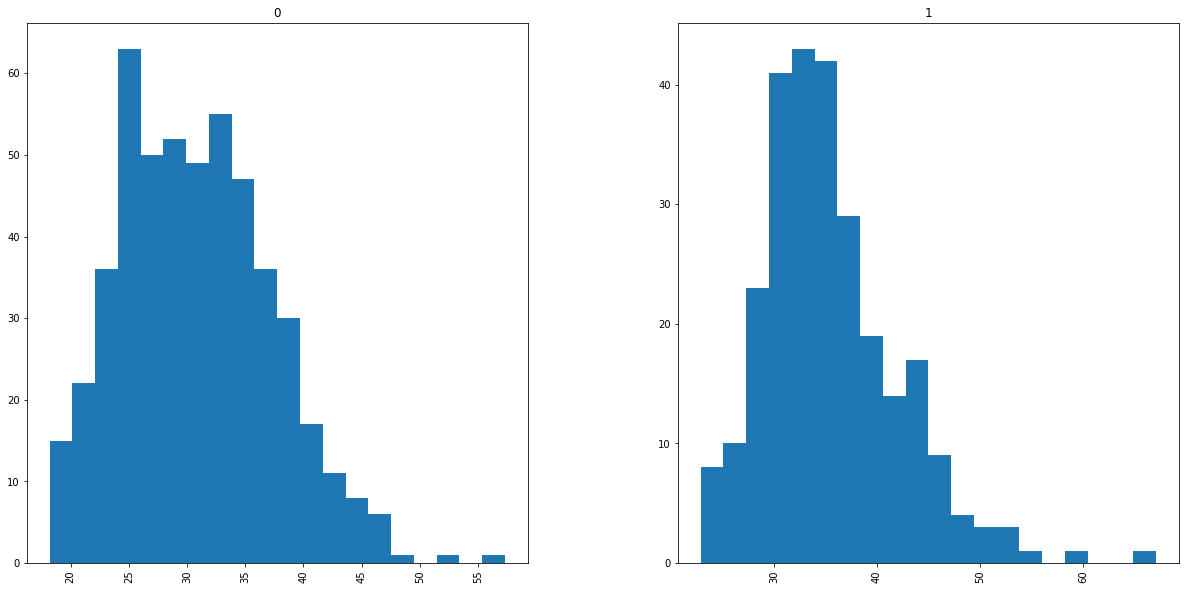

In [21]:
# histogram for BMI
# different histograms for Outcome = 1 and Outcome = 0
data.hist(column='BMI', by='Outcome', bins=20, figsize=(20,10));

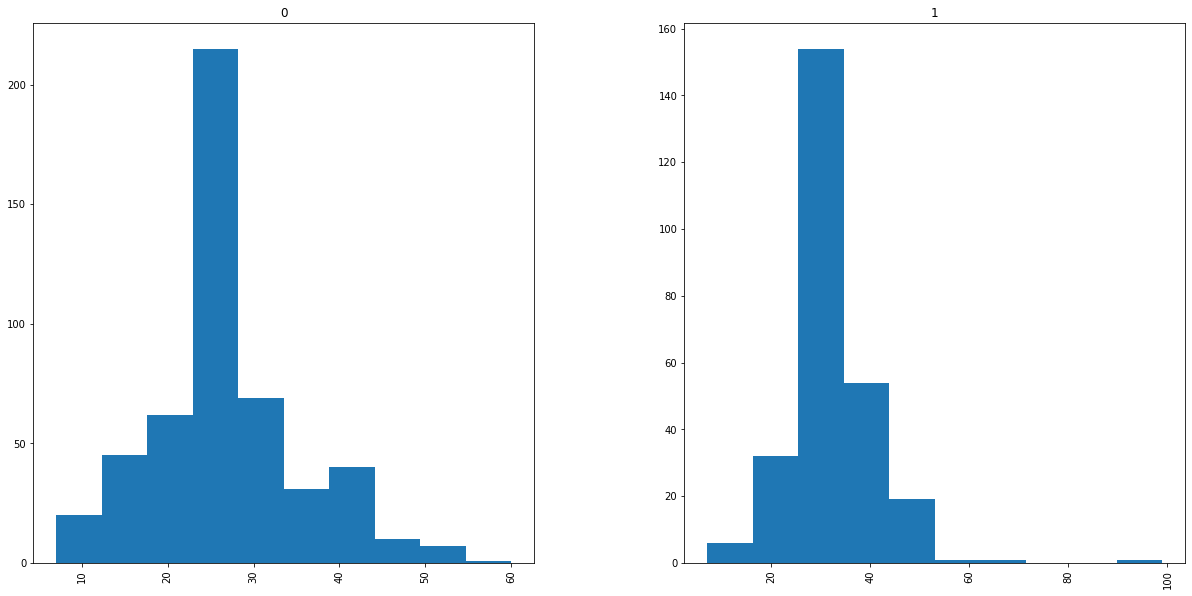

In [22]:
# histogram for SkinThickness
# there should be different histograms for Outcome = 1 and Outcome = 0
data.hist(column='SkinThickness', by='Outcome', bins=10, figsize=(20,10));

Next steps:
* create train and test data
* try to make a classification 
* test it and check the accuracy of the model